In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
df = pd.read_parquet('df_clima_sp.parquet')
df['precipitacao'] = df['precipitacao'].str.replace(',','.').astype(float)
df

,precipitacao,pressao_atm,temperatura,temperatura_orvalho,umidade_rel_ar,data
0,0.0,921.47,19.33,19.33,100.00,2022-01-01 00:00:00
1,0.0,921.73,19.33,19.33,100.00,2022-01-01 01:00:00
2,0.0,921.70,19.30,19.30,100.00,2022-01-01 02:00:00
3,0.0,921.53,19.03,19.00,100.00,2022-01-01 03:00:00
4,0.2,920.97,18.67,18.67,100.00,2022-01-01 04:00:00
...,...,...,...,...,...,...
7291,1.6,923.00,21.90,19.67,86.67,2023-10-31 19:00:00
7292,0.2,922.87,20.67,19.00,90.00,2023-10-31 20:00:00
7293,0.0,923.27,20.67,19.43,92.67,2023-10-31 21:00:00
7294,0.0,923.70,20.37,19.30,93.33,2023-10-31 22:00:00


In [96]:
df.isnull().sum()

precipitacao           655
pressao_atm            173
temperatura            173
temperatura_orvalho    173
umidade_rel_ar         173
data                     0
dtype: int64

In [3]:
df['precipitacao'] = df['precipitacao'].fillna(0.0)
df.isnull().sum()

precipitacao             0
pressao_atm            173
temperatura            173
temperatura_orvalho    173
umidade_rel_ar         173
data                     0
dtype: int64

In [4]:
df = df.dropna()
df.isnull().sum()

precipitacao           0
pressao_atm            0
temperatura            0
temperatura_orvalho    0
umidade_rel_ar         0
data                   0
dtype: int64

In [5]:
correlation_matrix = df.corr()
correlation_matrix

,precipitacao,pressao_atm,temperatura,temperatura_orvalho,umidade_rel_ar,data
precipitacao,1.000000,-0.075508,-0.003299,0.092578,0.086274,-0.002200
pressao_atm,-0.075508,1.000000,-0.502989,-0.383672,0.153046,0.121236
temperatura,-0.003299,-0.502989,1.000000,0.332461,-0.659862,-0.046306
temperatura_orvalho,0.092578,-0.383672,0.332461,1.000000,0.467660,-0.056208
umidade_rel_ar,0.086274,0.153046,-0.659862,0.467660,1.000000,0.013617
data,-0.002200,0.121236,-0.046306,-0.056208,0.013617,1.000000


C:\Users\eduardo.oliveira\AppData\Local\Temp\ipykernel_6612\2245379043.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Mean Squared Error: 1.2943385783786774
Root Mean Squared Error: 1.1376900185809302
Variância da Precipitação nos Dados de Teste: precipitacao    1.295181
dtype: float64


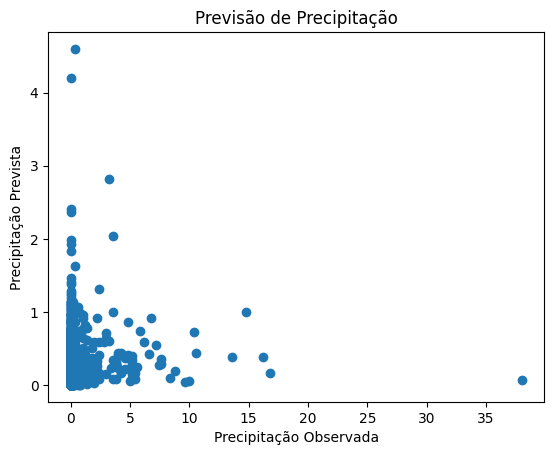

In [146]:
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


# Escolher as variáveis de entrada (features) e a variável de saída (target)
X = df[['pressao_atm', 'temperatura', 'temperatura_orvalho', 'umidade_rel_ar']]
y = df[['precipitacao']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Criar e treinar o modelo de regressão linear
model = RandomForestRegressor(max_depth= 10, min_samples_leaf= 10, min_samples_split= 25, n_estimators= 50)

model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

variance = np.var(y_test)
print(f'Variância da Precipitação nos Dados de Teste: {variance}')

# Visualizar as previsões
plt.scatter(y_test, y_pred)
plt.xlabel("Precipitação Observada")
plt.ylabel("Precipitação Prevista")
plt.title("Previsão de Precipitação")
plt.show()

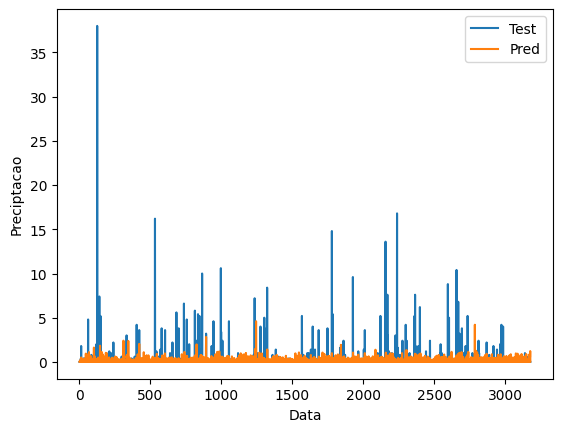

In [147]:
plt.plot([i for i in range(0,3177)],y_test,label='Test')
plt.plot([i for i in range(0,3177)],y_pred, label='Pred')

plt.xlabel('Data')
plt.ylabel('Preciptacao')
plt.legend()
plt.show()